In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

## 셀린느

In [3]:
mag_ce = pd.read_csv('./magazine/final/magazine_ce_stickword.csv', sep ='|', encoding = 'utf-8')

In [4]:
mag_ce

,magazine,brand,title,link,date,word_celine,ADFN,ADFN_2
0,A,Ce,코트 체크,http://www.allurekorea.com/2020/11/10/%ec%bd%9...,2020-11-10,"골드 잠금 장식으로 포인트를 준 케이프 체크 코트는 1백9만원, 산드로(SANDRO...","['골드', '장식', '포인트', '준', '케이프', '체크', '코트', '백...","['골드', '장식', '포인트', '준', '케이프', '체크', '코트', '백..."
1,A,Ce,데님이여 영원하라,http://www.allurekorea.com/2020/11/06/%eb%8d%b...,2020-11-06,"빈티지한 주름과 워싱이 특징인 데님 팬츠는 가격미정, CELINE(CELINE).","['빈티', '한', '주름', '워싱', '특징', '데님', '팬츠', 'CEL...","['빈티지', '한', '주름', '워싱', '특징', '데님', '팬츠', 'CE..."
2,A,Ce,남자 백’까지 갖고 싶어,http://www.allurekorea.com/2020/11/04/%eb%82%a...,2020-11-04,1970년대 에스닉한 분위기가 물씬 풍기는 CELINE의 방패 모양 숄더백.,"['대', '에스', '닉', '분위기', '물씬', 'CELINE', '방패', ...","['대', 에스닉, '분위기', '물씬', 'CELINE', '방패', '모양', ..."
3,A,Ce,예림-예리,http://www.allurekorea.com/2020/11/03/%ec%98%8...,2020-11-03,"재킷, 셔츠, 슈즈는 CELINE(CELINE), 블랙 스커트는 렉토, 이어링은 스...","['재킷', '셔츠', '슈즈', 'CELINE', 'CELINE', '블랙', '...","['재킷', '셔츠', '슈즈', 'CELINE', 'CELINE', '블랙', '..."
4,A,Ce,"GOOD TIME, 헨리",http://www.allurekorea.com/2020/10/26/good-tim...,2020-10-26,"재킷, 셔츠, 네크리스는 모두 CELINE(CELINE), 팬츠는 다잉브리드, 슈즈...","['재킷', '셔츠', '크리스', 'CELINE', 'CELINE', '팬츠', ...","['재킷', '셔츠', '크리스', 'CELINE', 'CELINE', '팬츠', ..."
...,...,...,...,...,...,...,...,...
759,W,Ce,G의 역습,http://www.wkorea.com/2016/11/15/g%ec%9d%98-%e...,2016-11-15,마야 셀리아 샐리(MAYA CELIA SALLY)N2017 S/S CELINE의 쇼...,"['마야', '셀', '리아', 'Maya', 'Celia', 'Sally', 'S...","['마야', '셀', '리아', 'Maya', 'Celia', 'Sally', SS..."
760,W,Ce,잊지 마 2,http://www.wkorea.com/2016/09/28/%ec%9e%8a%ec%...,2016-09-28,"코리아 파워, 록(ROKH)N지난해 S/S에 파리에서 데뷔한 32세 한국 디자이너 ...","['코리아', '파워', '록', 'Rokh', '지난해', 'S', 'S', '파...","['코리아', '파워', '록', 'Rokh', '지난해', SS, '파리', '데..."
761,W,Ce,사고 말겠어!,http://www.wkorea.com/2016/09/21/%ec%82%ac%ea%...,2016-09-21,패션 에디터 김신N가을이 다가오니 괜스레 감상적이 된다. 정제된 보헤미안 감성과 함...,"['패션', '에디터', '김신', '가을', '괜스레', '감상', '정제', '...","['패션', '에디터', '김신', '가을', '괜스레', '감상', '정제', '..."
762,W,Ce,남다르게,http://www.wkorea.com/2016/09/08/%eb%82%a8%eb%...,2016-09-08,"허리에 가방N주머니인 듯 아닌 듯, 벨트인 듯 아닌 듯 허리 가방’에 새로운 생명을...","['허리', '가방', '주머니', '듯', '아닌', '듯', '벨트', '듯',...","['허리', '가방', '주머니', '듯', '아닌', '듯', '벨트', '듯',..."


In [5]:
mag_ce['word'] = mag_ce['word_celine']

In [6]:
mag_CE = mag_ce[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [7]:
len(mag_CE)

764

In [8]:
idx4 = []
for i in range(len(mag_CE)):
    if i % 4 == 0 :
        idx4.append(i)

In [9]:
mag_CE4 = mag_CE.loc[idx4]

In [10]:
mag_CE4.reset_index(drop = True, inplace = True)

In [11]:
len(mag_CE4)

191

## 제니

### 제니 (유튜브 + 매거진)

In [12]:
tot_jI = pd.read_csv('./magazine/final/video_jisu_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [13]:
tot_jI['word'] = tot_jI['word_jisu']

In [14]:
tot_JI = tot_jI[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [15]:
len(tot_JI)

158

### 셀린느 + 제니

In [16]:
CE4JI = pd.concat([mag_CE4, tot_JI])

In [17]:
CE4JI.reset_index(drop = True, inplace = True)

In [18]:
CE4JI.to_csv('./magazine/final/CE4JI.csv', sep = '|', encoding = 'utf-8', index = False)

In [19]:
len(CE4JI)

349

## stopword 추가

In [20]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [21]:
sw_df.columns = ['stopword']

In [22]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [23]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [24]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [25]:
add_0 = ['진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각',
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '줄', '위', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어',
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히', '하며', '통해',
        '모든', '항상', '전', '기자', '다시', '오늘', '↑', '이자', '대해', '걸', '처음', '머리', '헤어', '고민', '뿐']
for w in add_0:
    stop_words.append(w)

In [26]:
add_1 = ['BLACKPINK', '리사', '제니', '로제']
for w in add_1:
    stop_words.append(w)

In [27]:
len(stop_words)

831

In [28]:
CE4JI['ADFN_2'] = CE4JI['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

In [29]:
noun_adj_list = []
for i in range(len(CE4JI)):
    for word in CE4JI.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [30]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('지수', 4233), ('예쁘다', 1889), ('귀엽다', 740), ('얼굴', 523), ('CELINE', 462), ('사랑', 453), ('노래', 390), ('DIOR', 305), ('매력', 289), ('목소리', 239), ('음악', 239), ('패션', 216), ('브랜드', 208), ('스타일', 207), ('춤', 165), ('컬렉션', 163), ('아이돌', 162), ('실력', 149), ('SLIMANE', 148), ('HEDI', 147), ('최고', 143), ('라이브', 131), ('성격', 126), ('디자이너', 125), ('음색', 124), ('드레스', 114), ('여자', 114), ('메이크업', 114), ('사랑스럽다', 113), ('팬츠', 110), ('블랙', 110), ('여신', 108), ('새로운', 107), ('디자인', 106), ('여성', 106), ('분위기', 102), ('배우', 101), ('외모', 101), ('컬러', 97), ('시즌', 96), ('비주얼', 96), ('세계', 93), ('지난', 92), ('재킷', 91), ('남성', 90), ('매치', 90), ('룩', 89), ('이미지', 87), ('아름다운', 87), ('쇼', 86), ('영국', 86), ('모델', 83), ('완성', 82), ('백', 81), ('핑크', 81), ('무대', 81), ('아이템', 75), ('옷', 73), ('라인', 72), ('PHOEBE', 71), ('PHILO', 71), ('디렉터', 71), ('팬', 71), ('장식', 70), ('셔츠', 70), ('LAURENT', 69), ('가장', 69), ('솔로', 68), ('SAINT', 66), ('레전드', 66), ('느낌', 65), ('스타', 65), ('CHANEL', 64), ('화이트', 64), ('걸그룹', 64), ('노력'

In [31]:
count = Counter(noun_adj_list)

In [32]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('지수', 4233)
('예쁘다', 1889)
('귀엽다', 740)
('얼굴', 523)
('CELINE', 462)
('사랑', 453)
('노래', 390)
('DIOR', 305)
('매력', 289)
('목소리', 239)
('음악', 239)
('패션', 216)
('브랜드', 208)
('스타일', 207)
('춤', 165)
('컬렉션', 163)
('아이돌', 162)
('실력', 149)
('SLIMANE', 148)
('HEDI', 147)
('최고', 143)
('라이브', 131)
('성격', 126)
('디자이너', 125)
('음색', 124)
('드레스', 114)
('여자', 114)
('메이크업', 114)
('사랑스럽다', 113)
('팬츠', 110)
('블랙', 110)
('여신', 108)
('새로운', 107)
('디자인', 106)
('여성', 106)
('분위기', 102)
('배우', 101)
('외모', 101)
('컬러', 97)
('시즌', 96)
('비주얼', 96)
('세계', 93)
('지난', 92)
('재킷', 91)
('남성', 90)
('매치', 90)
('룩', 89)
('이미지', 87)
('아름다운', 87)
('쇼', 86)
('영국', 86)
('모델', 83)
('완성', 82)
('백', 81)
('핑크', 81)
('무대', 81)
('아이템', 75)
('옷', 73)
('라인', 72)
('PHOEBE', 71)
('PHILO', 71)
('디렉터', 71)
('팬', 71)
('장식', 70)
('셔츠', 70)
('LAURENT', 69)
('가장', 69)
('솔로', 68)
('SAINT', 66)
('레전드', 66)
('느낌', 65)
('스타', 65)
('CHANEL', 64)
('화이트', 64)
('걸그룹', 64)
('노력', 63)
('데님', 62)
('톱', 62)
('스커트', 62)
('복', 62)
('레드', 61)
('코트', 59)
('하우스

In [33]:
top500 = pd.DataFrame(word_list)

In [34]:
top500.columns = ['word', 'count']

In [35]:
top500.to_csv('./CE4JI_top500.csv', sep='|', encoding = 'utf-8', index = False)

## 워드클라우드 만들기

In [36]:
import matplotlib.pyplot as plt

In [37]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [38]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [39]:
from wordcloud import WordCloud

In [40]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

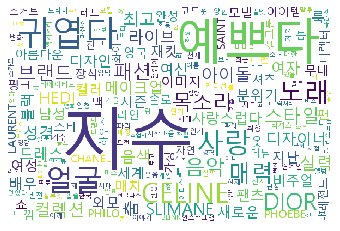

In [41]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('CE4JI.png')

In [42]:
CE4JI.to_csv('./magazine/final/CE4JI_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)